In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('D:/Programming/Data_Science/Codes/5_Machine_Learning/1_Regression/static/Algerian_forest_fires_dataset_UPDATE.csv', header = 1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.shape

(246, 14)

#### Summary of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### Conclusion: Looks like all the features are of object type that can be of numerical type.

# **Data Cleaning**

#### Checking for null values and removing them.

In [6]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [7]:
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [8]:
df.dropna(inplace = True)
df.reset_index(drop = True, inplace = True)

In [9]:
df.shape

(244, 14)

In [10]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

The dataset is converted into two sets based on Region from 122th index, 
we can make a new column based on the Region 

 **1 : "Bejaia Region Dataset"**
 
 **2 : "Sidi-Bel Abbes Region Dataset"**

In [11]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [12]:
df.loc[:122, 'Region'] = 1 # For Bejaia Region Dataset
df.loc[122:, 'Region'] = 2 # For Sidi-Bel Abbes Region Dataset

In [13]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


In [14]:
df.drop(122, inplace = True)
df.reset_index(drop = True, inplace = True)

In [15]:
df.shape

(243, 15)

#### Checking the column names

In [16]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

### Conclusion: As we can see some columns have extra spaces in their names, so remove them.

In [17]:
df.columns = df.columns.str.strip()

In [18]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

#### Changing required columns to integer and float type

In [19]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


In [20]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Region']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Region']].astype('int')
df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


#### Checking **Classes** column

In [22]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

### Conclusion: Values in the **Classes** column have values with extra spaces, so remove them.

In [23]:
df.Classes = df.Classes.str.strip()

In [24]:
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [25]:
df.to_csv("Algerian_forest_fires_dataset_CLEANED.csv", index = False)

#### Loading Cleaned Dataset

In [26]:
df = pd.read_csv("Algerian_forest_fires_dataset_CLEANED.csv")

In [27]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


#### Eleminating the **day**, **month** and **year** column

In [28]:
df.drop(['day', 'month', 'year'], axis = 1, inplace = True)

In [29]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


#### Encoding **not fire** as **0** and **fire** as **1** in Classes

In [30]:
df['Classes'] = df['Classes'].apply(lambda x: 1 if x == 'fire' else 0)

In [31]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [32]:
df.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

# **Visualisation**

#### Distribution of all features

In [33]:
df.melt(var_name = 'Feature')

,Feature,value
0,Temperature,29.0
1,Temperature,29.0
2,Temperature,26.0
3,Temperature,25.0
4,Temperature,27.0
...,...,...
2911,Region,2.0
2912,Region,2.0
2913,Region,2.0
2914,Region,2.0


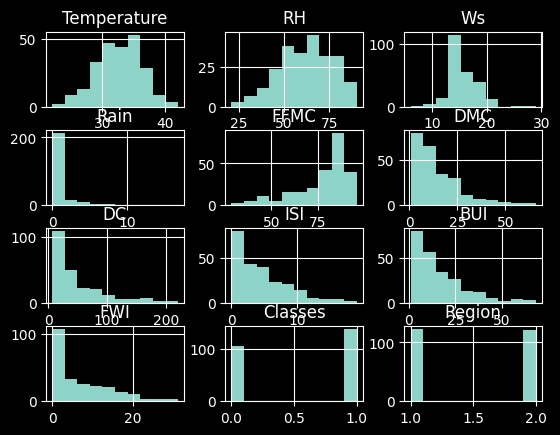

In [34]:
df.hist()
plt.show()

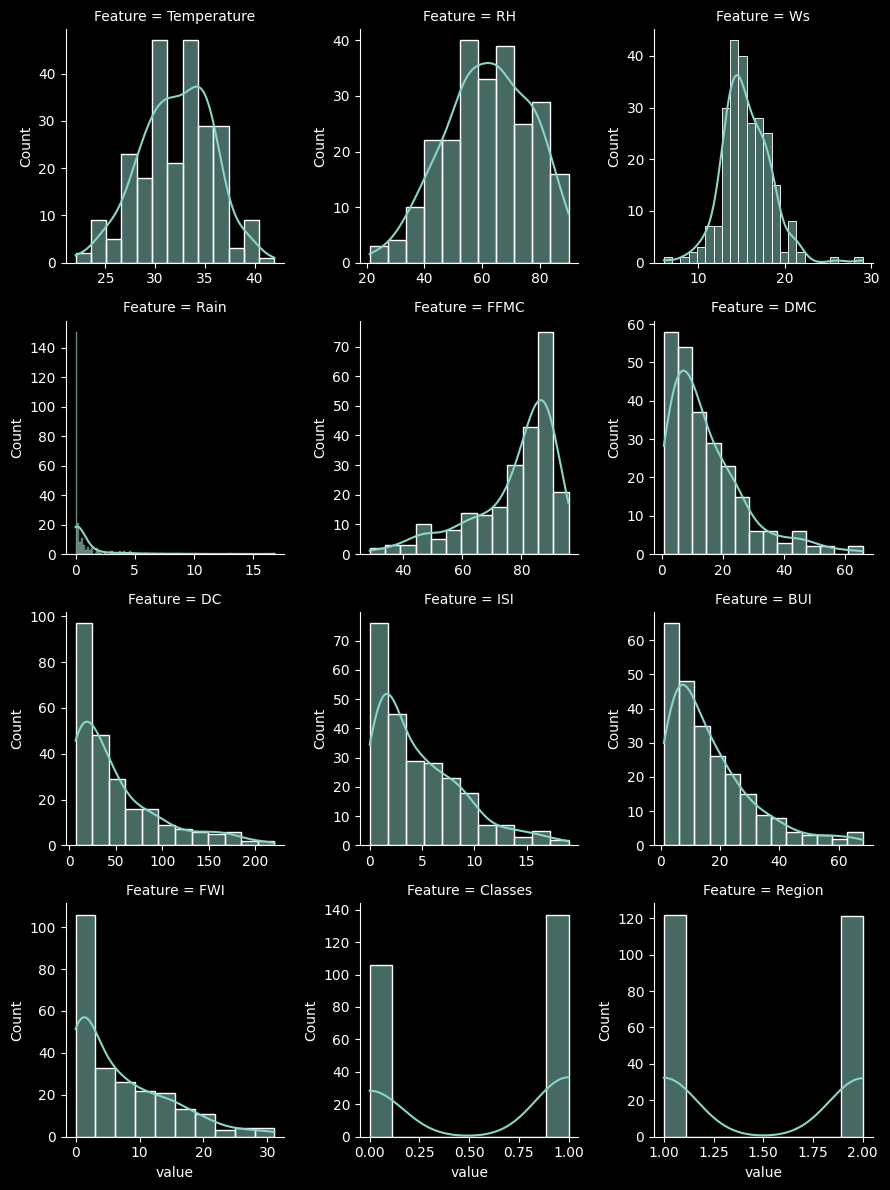

In [35]:
plot = sns.FacetGrid(df.melt(var_name = 'Feature'), col = 'Feature', col_wrap = 3, sharex = False, sharey = False)
plot.map(sns.histplot, "value", kde = True)

#### Pie Chart for **Classes**

In [36]:
percentage = df.Classes.value_counts(normalize = True)
print(percentage)

1    0.563786
0    0.436214
Name: Classes, dtype: float64


[]

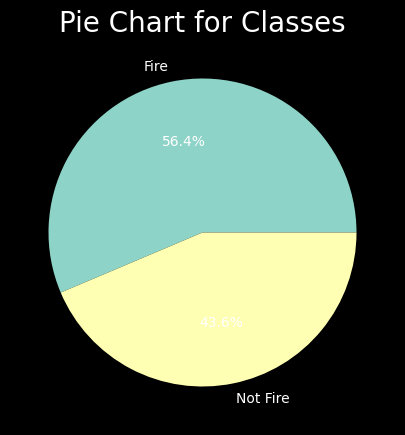

In [37]:
plt.figure(figsize = (10, 5))
plt.pie(df.Classes.value_counts(), labels = ['Fire', 'Not Fire'], autopct = "%1.1f%%", normalize = True)
plt.title("Pie Chart for Classes", fontsize = 20)
plt.plot()

#### Plotting correlations

<Axes: >

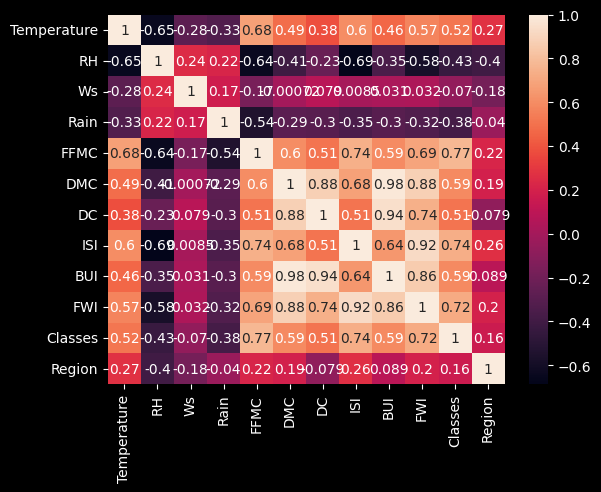

In [38]:
sns.heatmap(df.corr(), annot = True)

#### Analyzing outliers

In [39]:
df = pd.read_csv("Algerian_forest_fires_dataset_CLEANED.csv")
df['Classes'] = df['Classes'].apply(lambda x: 1 if x == 'fire' else 0)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


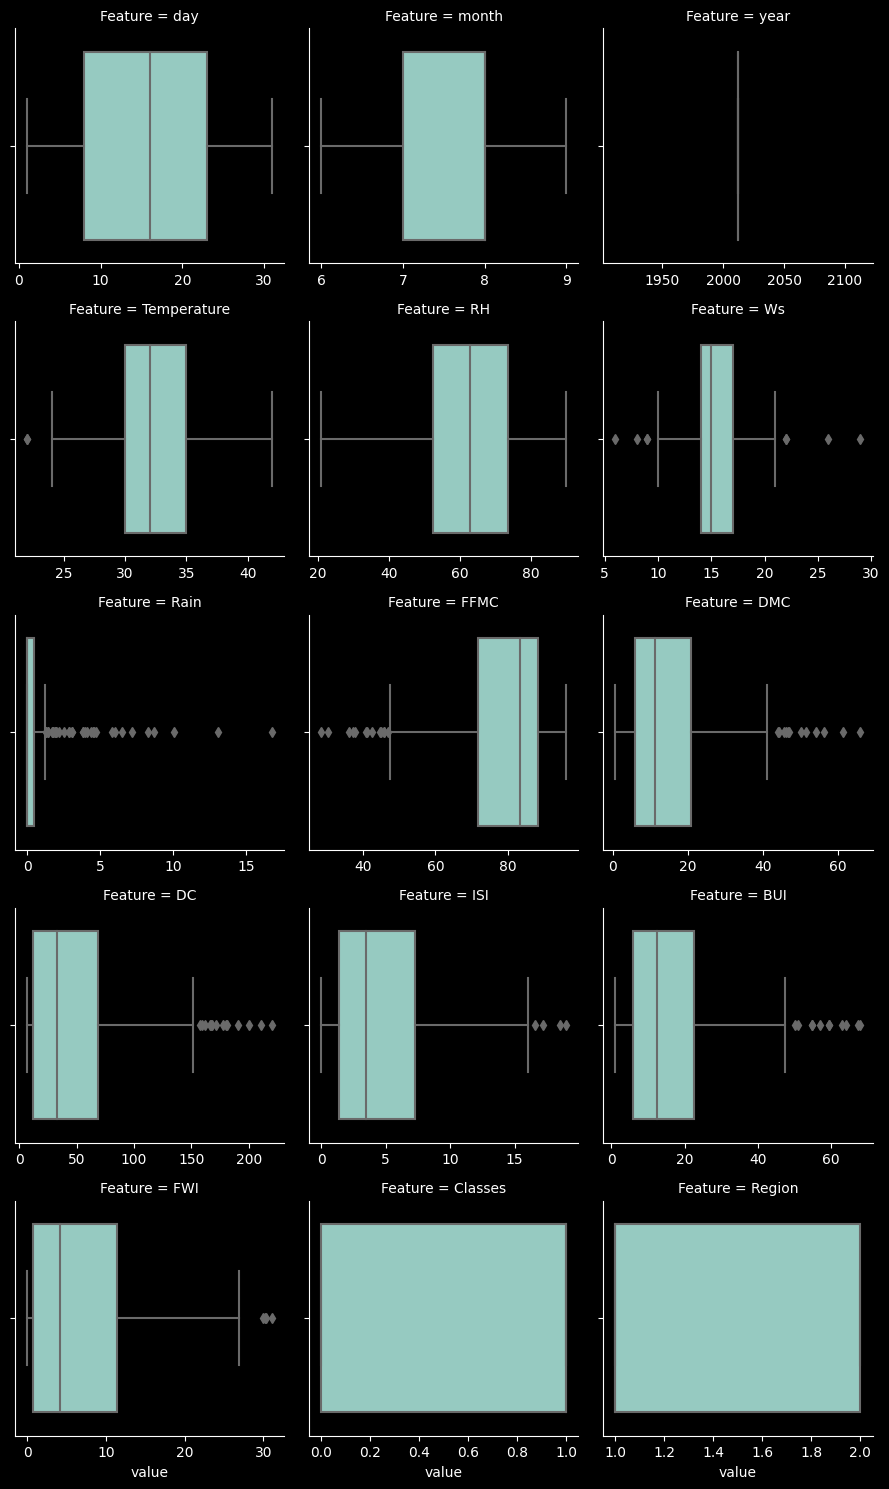

In [40]:
plot = sns.FacetGrid(df.melt(var_name = 'Feature'), col = 'Feature', col_wrap = 3, sharex = False, sharey = False)
plot.map(sns.boxplot, 'value', order = df.columns)

#### Monthwise Fire Analysis

In [41]:
df = pd.read_csv("Algerian_forest_fires_dataset_CLEANED.csv")

Text(0.5, 1.0, 'Monthly analysis for Bejaia Region')

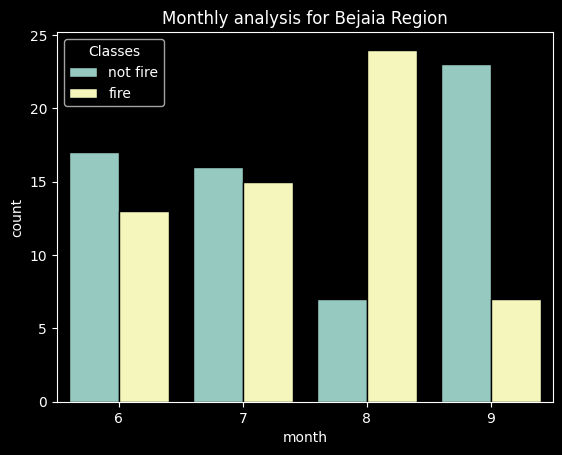

In [42]:
sns.countplot(data = df[df['Region'] == 1], x = 'month', hue = 'Classes', ec = 'black')
plt.title("Monthly analysis for Bejaia Region")

Text(0.5, 1.0, 'Monthly analysis for Sidi-Bel Abbes Region')

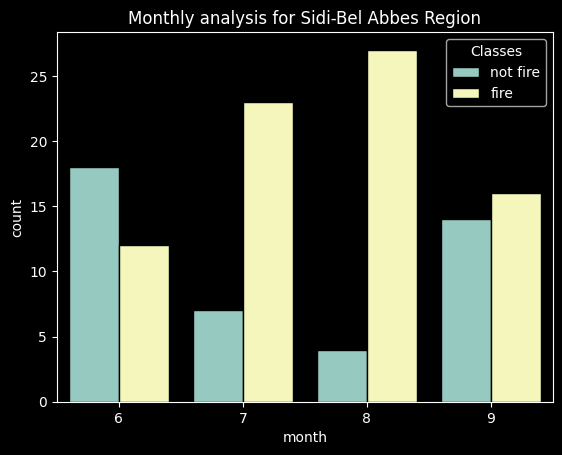

In [43]:
sns.countplot(data = df[df['Region'] == 2], x = 'month', hue = 'Classes', ec = 'black')
plt.title("Monthly analysis for Sidi-Bel Abbes Region")

Text(0.5, 1.0, 'Monthly analysis for all regions')

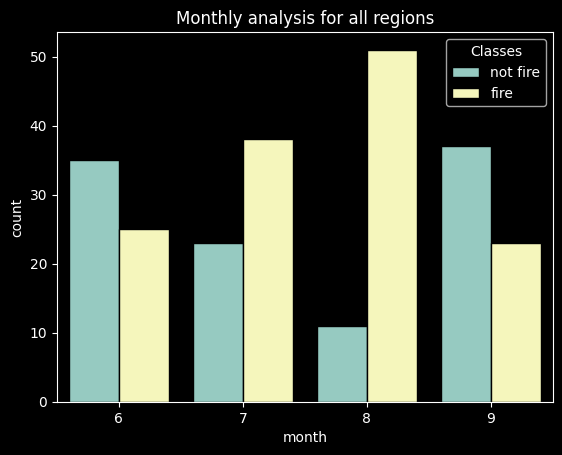

In [44]:
sns.countplot(data = df, x = 'month', hue = 'Classes', ec = 'black')
plt.title("Monthly analysis for all regions")

### Conclusion:
* #### Its observed that July and August had the most number of forest fires for both regions. And from the above plot of months, we can understand few things
* #### Most of the fires happened in August and very high Fires happened in only 3 months - **June, July and August.**
* #### Less Fires was on September

# **EDA**

In [45]:
df = pd.read_csv("Algerian_forest_fires_dataset_CLEANED.csv")
df['Classes'] = df['Classes'].apply(lambda x: 1 if x == 'fire' else 0)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [46]:
def barplot(df, feature, xlabel):
    plt.figure(figsize = (14, 8))
    by_feature = df.groupby([feature], as_index = False)['Classes'].sum()
    ax = sns.barplot(data = by_feature, x = feature, y = 'Classes')
    ax.set(xlabel = xlabel, ylabel = 'Fire Count')
     

In [47]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

## Plots of all columns and corresponing fire counts

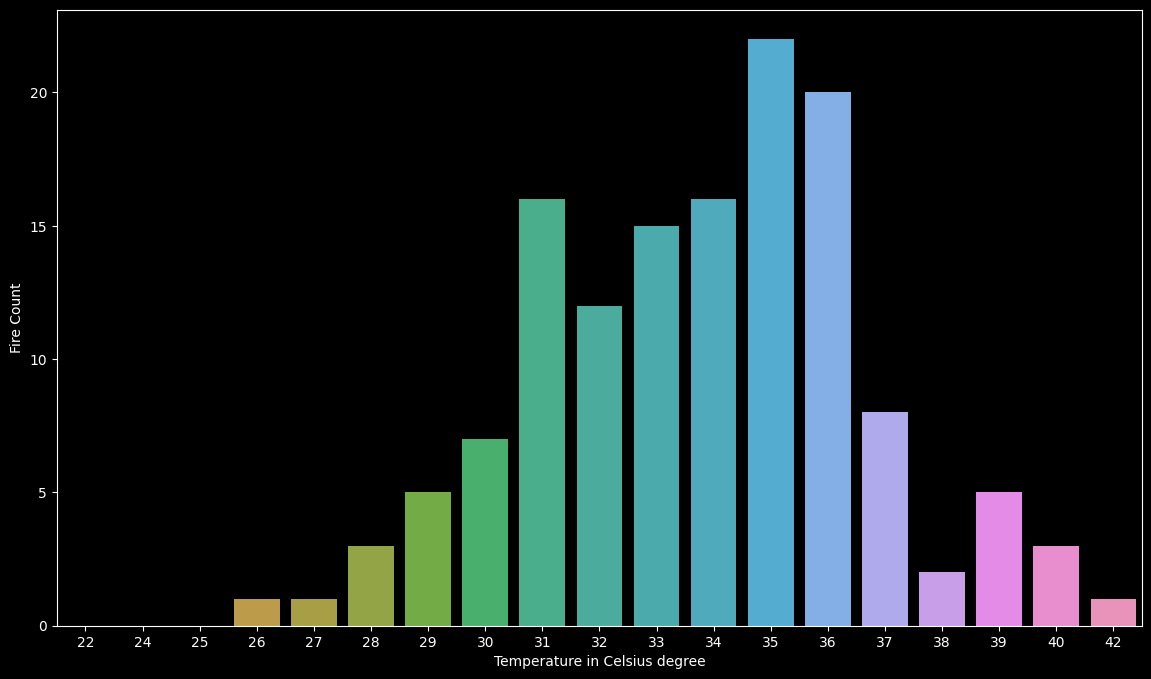

In [48]:
barplot(df, 'Temperature', 'Temperature in Celsius degree')

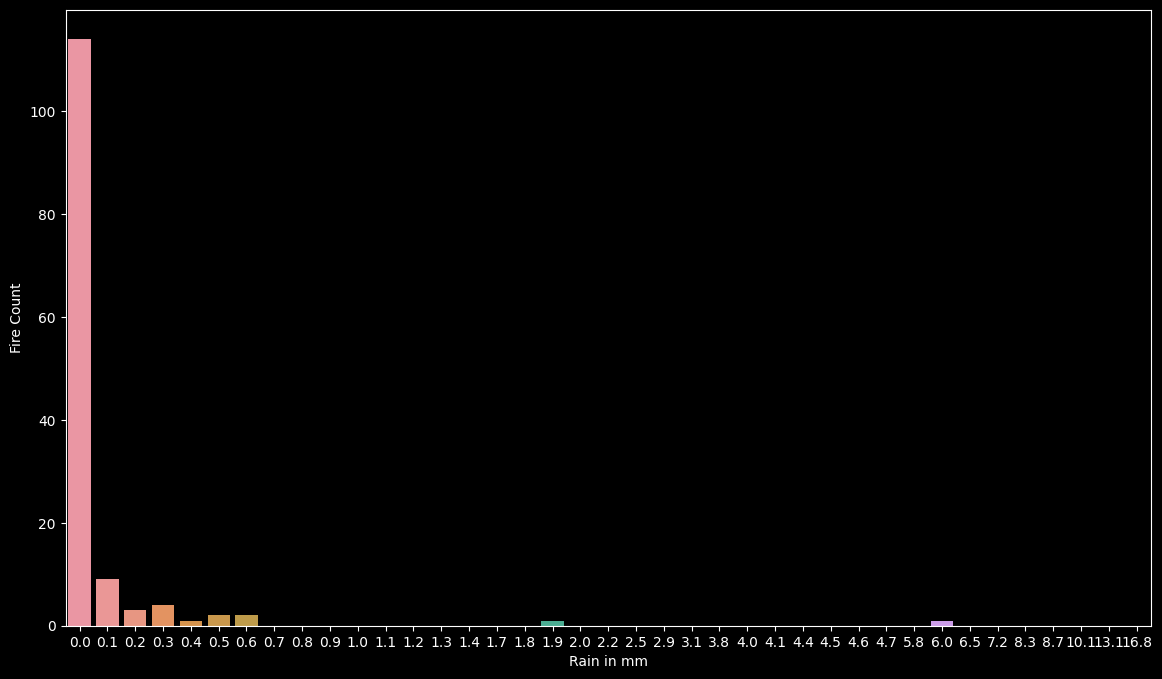

In [49]:
barplot(df, 'Rain', 'Rain in mm')

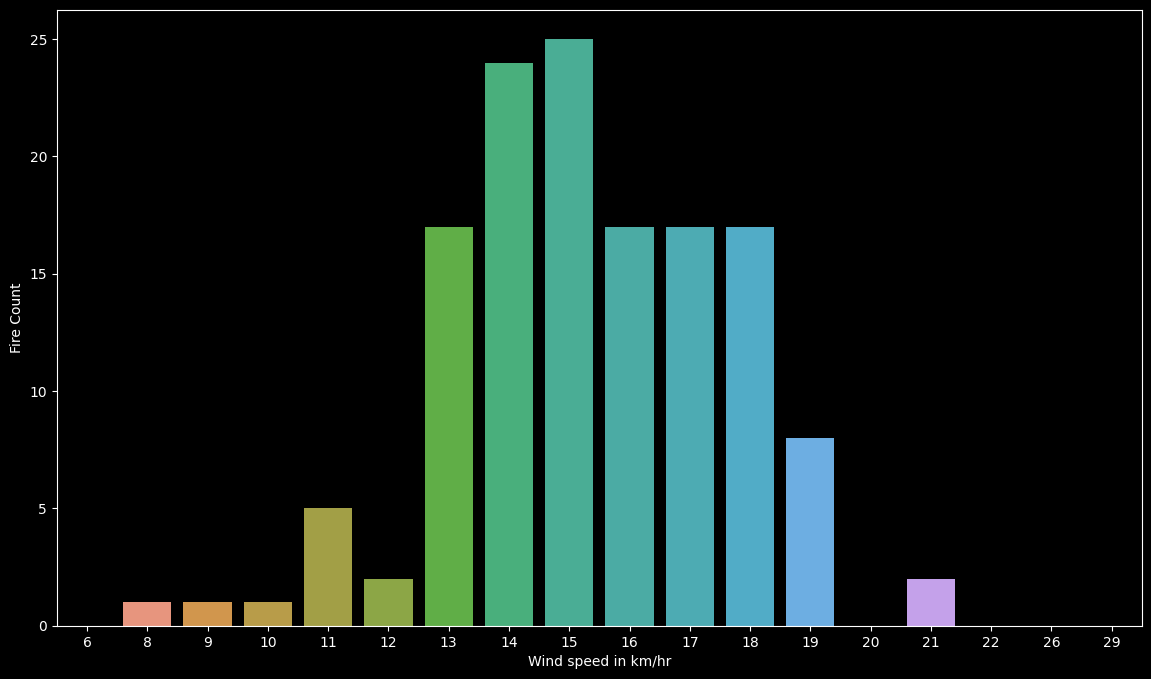

In [50]:
barplot(df, 'Ws', 'Wind speed in km/hr')

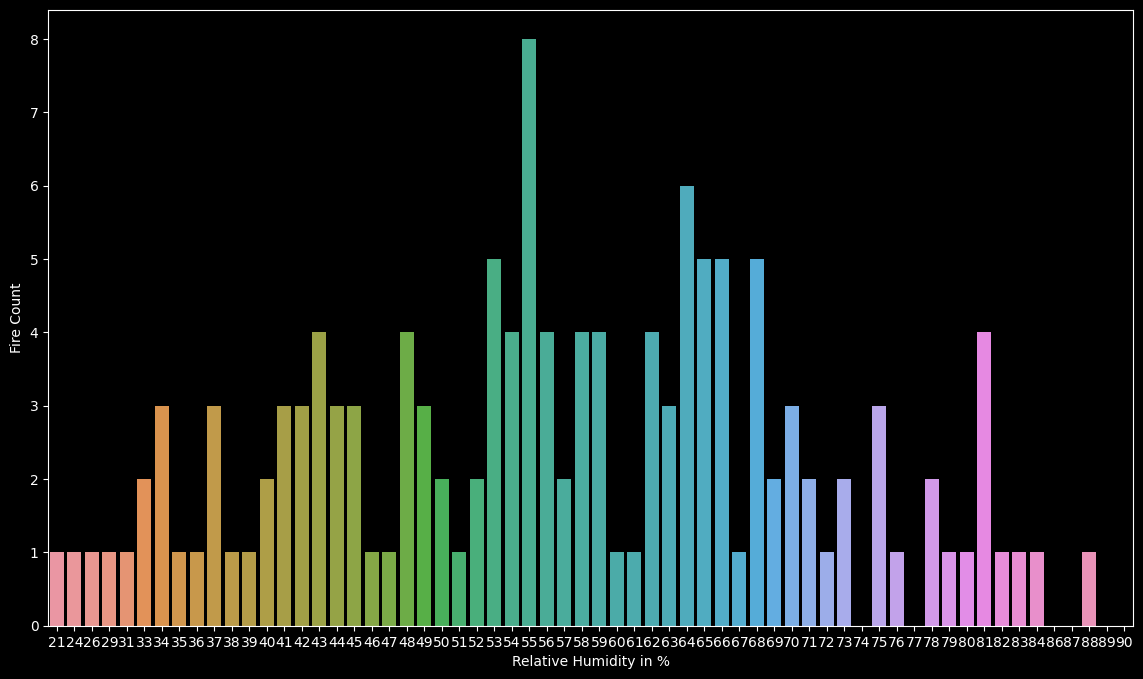

In [51]:
barplot(df, 'RH', 'Relative Humidity in %')

## Box plot of all features

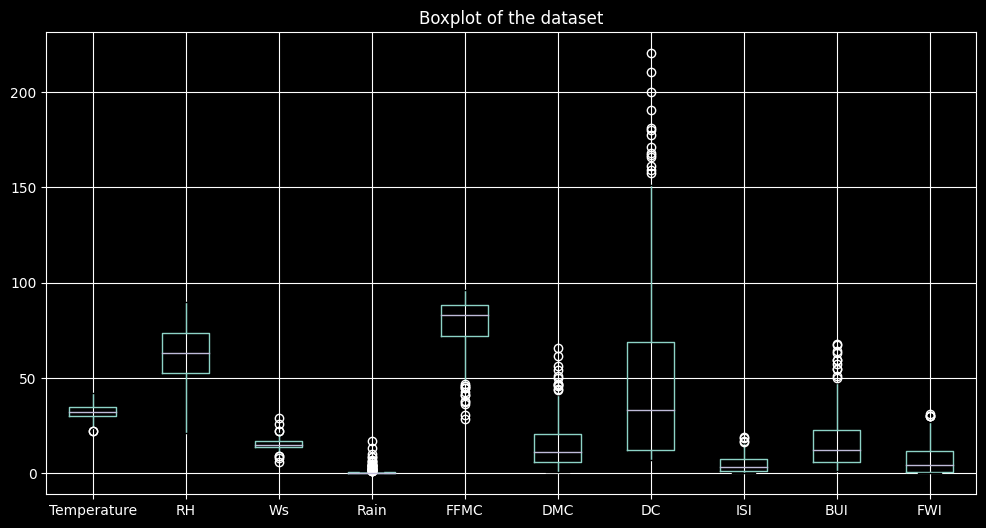

In [52]:
fig = plt.figure(figsize = (12, 6))
ax = df.drop(['Classes', 'Region', 'day', 'month', 'year'], axis = 1).boxplot()
ax.set_title('Boxplot of the dataset')
plt.show()

In [53]:
df = pd.read_csv("Algerian_forest_fires_dataset_CLEANED.csv")

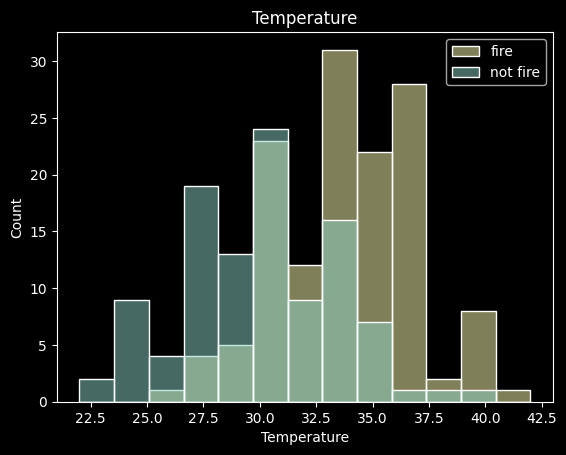

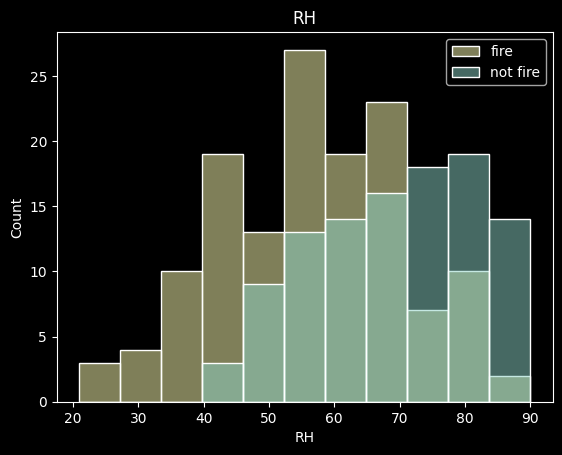

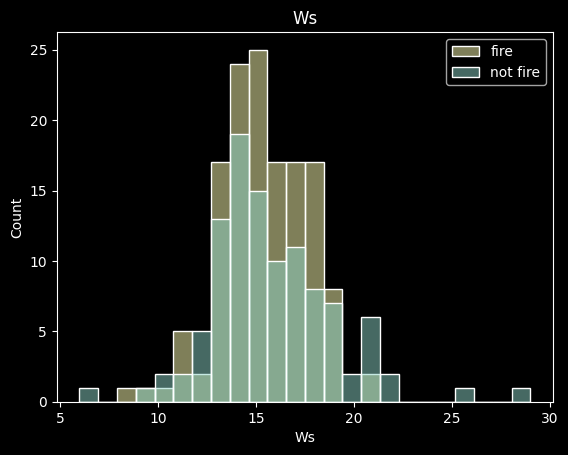

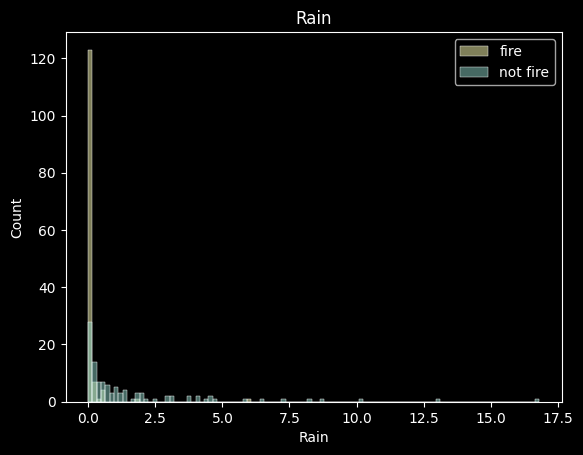

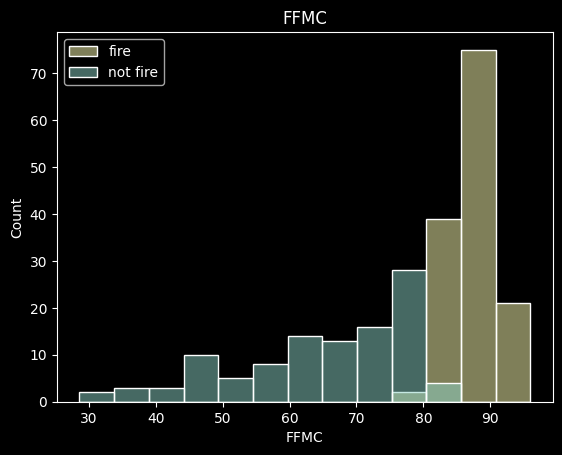

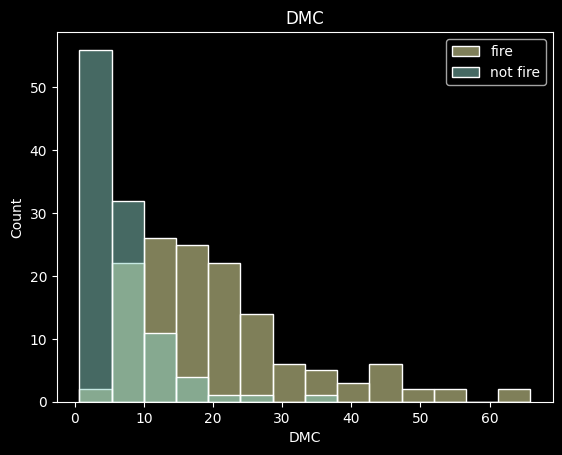

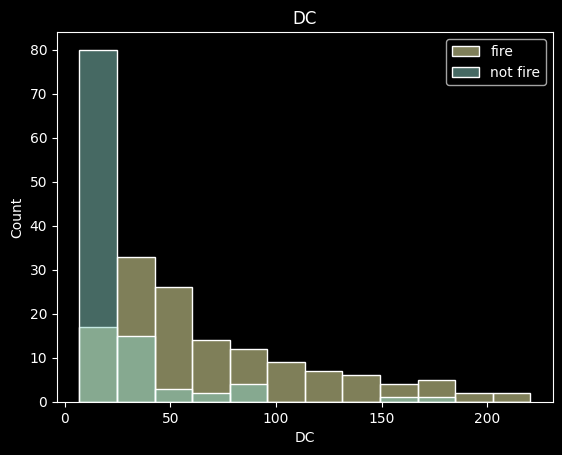

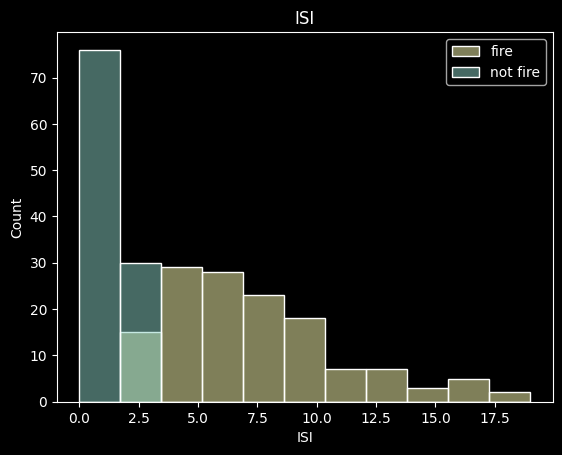

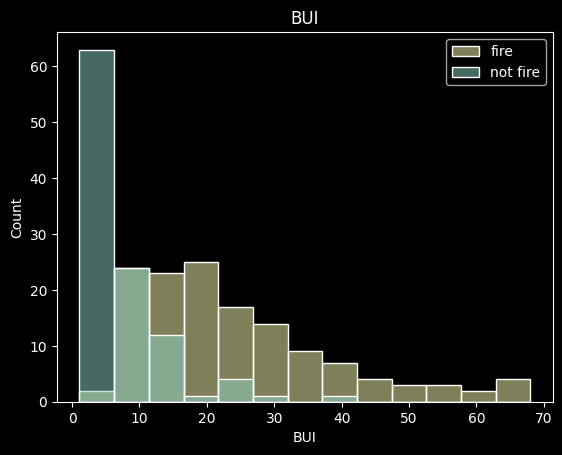

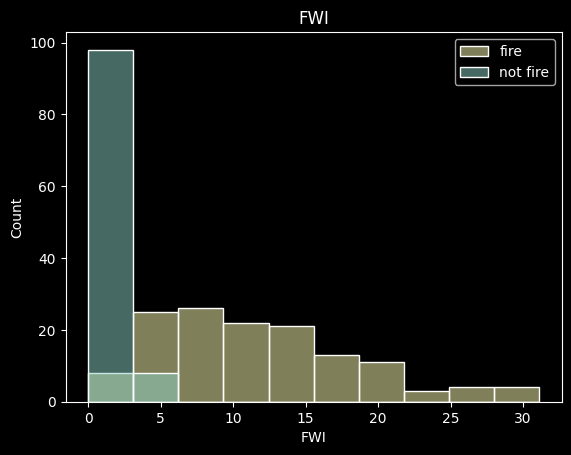

In [54]:
for feature in df.drop(['Classes', 'Region', 'day', 'month', 'year'], axis = 1):
    sns.histplot(data = df, x = feature, hue = 'Classes')
    plt.legend(labels = ['fire', 'not fire'])
    plt.title(feature)
    plt.show()

### REPORT 
#### Weather System Report
* **Temperature** Highest Fire counts happened between **30-37 degree Celsius**
* **Rain** Highest Fire counts happened when there was no rain to very less rain ie. **0.0 to 0.3.**
* **Wind Speed** highest Fire count happened when the wind speed were between **13 to 19 Km/hr.**
* **Relative Humidity** highest fire count happened when the RH is between **50 to 80%.**


#### FWI System Components Report 
FWI (Canadian Forest Fire Weather Index)
* **Fine Fuel Moisture Code (FFMC) index** which ranges between *28.6 to 92.5*, 
    here **above 75** has higher chance of Forest fires.
    
* **Duff Moisture Code (DMC) index** which ranges between *1.1 to 65.9*, 
    here 1.1-10 has lower chance of Forest fires whereas above **10-30 DMC** has very high evidence of Forest fires in past.
    
* **Drought Code (DC) index** which ranges between *7 to 220.4*, 
    here 0-25 is safe and has lower chance of Forest fires whereas range **above 25 DC** has higher chance of forest fires.
    
* **Initial Spread Index (ISI) index** which ranges between *0 to 18*, 
    here 0-3 has lower Forest fires and **above 3 ISI** has higher chance of Forest fires.
    
* **Buildup Index (BUI) index** which ranges between *1.1 to 68*, 
    here 1.1 to 10 has lower Forest fire chance and **above 10 BUI has** higher chance of forest fires.
    
* **Fire Weather Index (FWI) Index** which ranges between *1 to 31.1*, 
    here 0-3 has lower chance of Forest fires and **3-25 FWI** has higher chance of forest fires.

In [55]:
df = pd.read_csv("Algerian_forest_fires_dataset_CLEANED.csv")
df['Classes'] = df['Classes'].apply(lambda x: 1 if x == 'fire' else 0)
df.to_csv("Algerian_forest_fires_dataset_CLEANED.csv", index = False)